## Observations and Insights 

In [269]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# # Combine the data into a single dataset
df = pd.merge(mouse_metadata, study_results, on="Mouse ID" )
df.to_csv("test_data.csv")
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [218]:
# Checking the number of mice.
unique_mice = df['Mouse ID'].unique()
num_unique_mice = len(df['Mouse ID'].unique())

print(f"Number of unique mice is: {num_unique_mice}")

Number of unique mice is: 249


In [219]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Iterate through each mouses data  
# If there are no duplicates then the index length and unique timepoints length should be the same  
 
duplicate_ids = []
for mouse in unique_mice:
    
    mouse_data = df[df["Mouse ID"] == mouse]
    if len(mouse_data.index) != len(mouse_data["Timepoint"].unique()):
        duplicate_ids.append(mouse)
               
print(f"Mouse ID with duplicate time points: {duplicate_ids}")


Mouse ID with duplicate time points: ['g989']


In [220]:
# Optional: Get all the data for the duplicate mouse ID. 
removed_data = pd.DataFrame()
for ids in duplicate_ids:
    removed_data = removed_data.append(df[df ['Mouse ID'] == ids], sort=False)

print("Data removed from the the main data set due to duplicate time points:")
display(removed_data)


Data removed from the the main data set due to duplicate time points:


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [221]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for ids in duplicate_ids:
    df = df[df ['Mouse ID'] != ids]

print("Data with duplicate timepoints has now been removed from the main DataFrame")
    

Data with duplicate timepoints has now been removed from the main DataFrame


In [75]:
# Checking the number of mice in the clean DataFrame.
# Checking the number of mice.
unique_mice = df['Mouse ID'].unique()
num_unique_mice = len(df['Mouse ID'].unique())

print(f"Number of unique mice in the clean DataFrame is: {num_unique_mice}")
print("")

Number of unique mice in the clean DataFrame is: 248



## Summary Statistics

In [223]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stats = df.groupby('Drug Regimen').agg(Mean=('Tumor Volume (mm3)', 'mean'), Median=('Tumor Volume (mm3)', 'median'),
                                               Std_Dev=('Tumor Volume (mm3)', 'std'), SEM=('Tumor Volume (mm3)', 'sem'))

# Format and display
summary_stats.iloc[:,0:] = round(summary_stats.iloc[:,0:],4)
print("")
print("Summary stats for tumor volume (units = mm3), for each drug regimen:")
summary_stats.reset_index()


Summary stats for tumor volume (units = mm3), for each drug regimen:


,Drug Regimen,Mean,Median,Std_Dev,SEM
0,Capomulin,40.6757,41.5578,4.9948,0.3293
1,Ceftamin,52.5912,51.7762,6.2682,0.4698
2,Infubinol,52.8848,51.8206,6.5672,0.4922
3,Ketapril,55.2356,53.6987,8.2797,0.6039
4,Naftisol,54.3316,52.5093,8.1347,0.5965
5,Placebo,54.0336,52.2889,7.8210,0.5813
6,Propriva,52.3209,50.4463,6.6221,0.5443
7,Ramicane,40.2167,40.6732,4.8463,0.3210
8,Stelasyn,54.2331,52.4317,7.7104,0.5731
9,Zoniferol,53.2365,51.8185,6.9666,0.5164


## Bar and Pie Charts

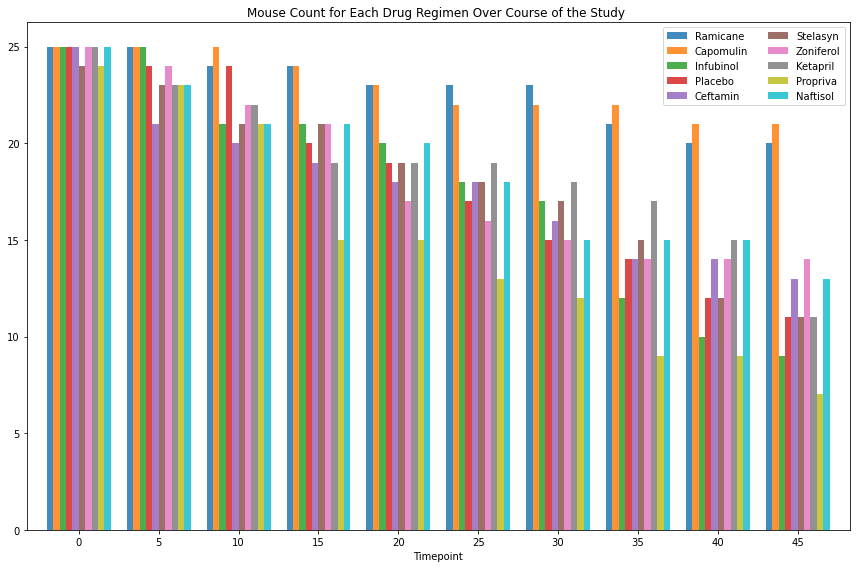

In [225]:
# -- BAR PLOT USING PANDAS -- #

# Create a dataframe with only the unique Timepoints
plot_data = pd.DataFrame({"Timepoint":df['Timepoint'].unique()})

# Iterate throught the drug regimens, grouping their data by timepoint and counting number of mice
for treatment in df['Drug Regimen'].unique():
    data = df[df['Drug Regimen'] == treatment].groupby(['Timepoint'])['Mouse ID'].nunique().reset_index()
    plot_data[treatment] = data['Mouse ID']

# Plot the resulting DataFrame using Pandas.plot
mouse_plot = plot_data.plot.bar(x="Timepoint", figsize=(12,8), rot="horizontal", width=0.8, alpha=0.85,
                                legend=True, title="Mouse Count for Each Drug Regimen Over Course of the Study ")

plt.tight_layout()
plt.legend(ncol=2)
plt.show()



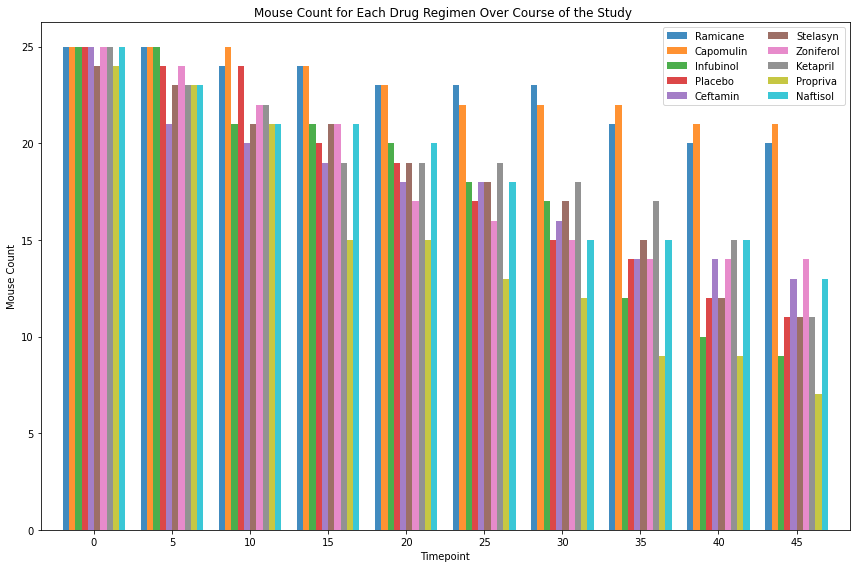

In [227]:
# -- BAR PLOT USING PYPLOT -- #

# x-axis set to the unique values in the 'Timepoint' column of the plot_data DataFrame
x_axis = plot_data['Timepoint'].unique()
# width of each bar specified (needed for spacing of bars)
bar_width = 0.4

# PLOT THE BARS
fig, ax = plt.subplots(figsize=(12,8))

# Iterate through columns of plot_data (each colulmn is a different drug regimen)
#   plot that drug regimens data, allowing for a spacing (= to bar_width) so that bars don't overlap 
for col in range(1, len(plot_data.columns)):
    ax.bar([x + (bar_width*col) for x in x_axis], plot_data.iloc[:,col], width=0.4, alpha=0.85, label=plot_data.columns[col])
 
# FORMATTING AND DISPLAY
ax.legend(ncol=2)
plt.xlabel("Timepoint")
plt.ylabel("Mouse Count")
plt.title("Mouse Count for Each Drug Regimen Over Course of the Study ")
plt.xlim()
plt.xticks(ticks=(x_axis+2.2), labels=plot_data['Timepoint'].unique())
plt.xlim(min(x_axis)-(bar_width*3), max(x_axis)+bar_width*14)
plt.tight_layout()
plt.show()

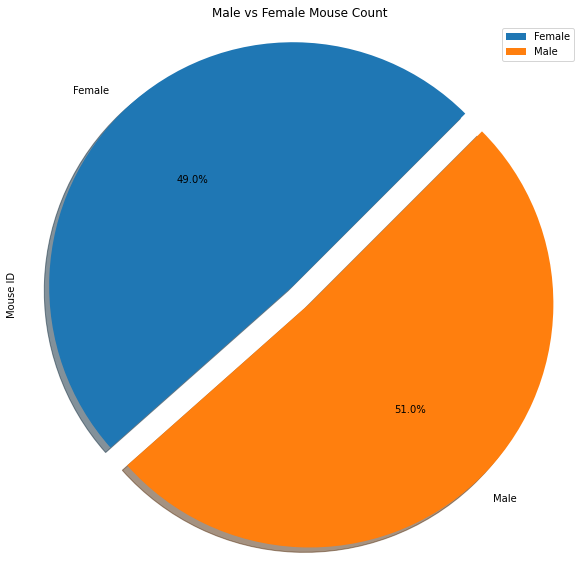

In [229]:
# -- PIE PLOT USING PANDAS -- #

# Group data by sex using Pandas groupby
plot_data_2 = df.groupby(['Sex']).count()

# Plot the data as a Pandas plot pie chart
plot = plot_data_2.plot.pie(y='Mouse ID', startangle=45, figsize=(10,10), 
                            autopct='%1.1f%%', shadow=True, title="Male vs Female Mouse Count",
                            # determine element that has the greatest value and apply explode 
                            # This statement returns an array of booleans which is multipled by the explode factor 
                            explode=(plot_data_2['Mouse ID'] == max(plot_data_2['Mouse ID'])) * 0.1)

plt.axis("equal")
plt.show()


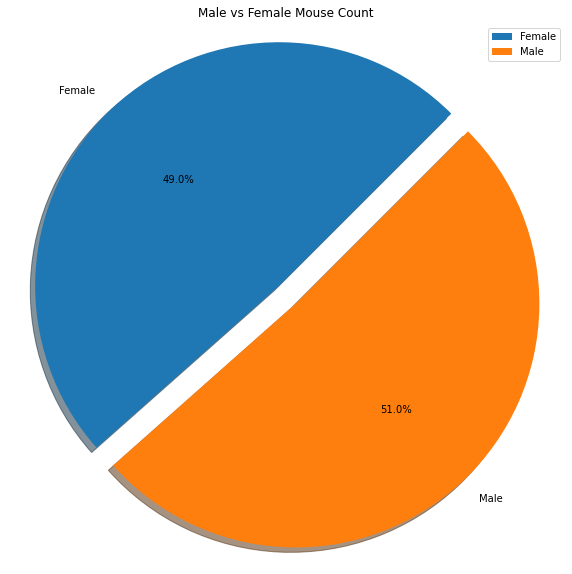

In [230]:
# -- PIE PLOT USING PYPLOT -- #

plt.subplots(figsize=(10,10))

plot_2 = plt.pie(plot_data_2['Mouse ID'], labels=plot_data_2.index, startangle=45, 
         autopct='%1.1f%%', shadow=True,
         # determine element that has the greatest value and apply explode 
         # This statement returns an array of booleans which is multipled by the explode factor 
         explode=(plot_data_2['Mouse ID'] == max(plot_data_2['Mouse ID'])) * 0.1)

plt.legend()
plt.title("Male vs Female Mouse Count")
plt.axis("equal")
plt.show()




In [236]:
len(df2["Mouse ID"].unique())

100

## Quartiles, Outliers and Boxplots

In [237]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Create a new df of just the promising treatments 
df2 = df[(df['Drug Regimen'] == 'Capomulin') |
         (df['Drug Regimen'] == 'Ramicane') |
         (df['Drug Regimen'] == 'Infubinol') |
         (df['Drug Regimen'] == 'Ceftamin')]

final_timepoint = []
final_vol = []
treatment = []

# Create a df with Mouse ID, Drug Regimen, Final tumor volume and final time point for each mouse
for mouse in df2["Mouse ID"].unique():
    data = df2[df2['Mouse ID'] == mouse] # the mouses  data
    final_vol.append(data.iloc[-1, 6]) # the final row, tumor vol column
    final_timepoint.append(data.iloc[-1, 5]) # the final row, timepoint column
    treatment.append(data.iloc[-1, 1]) # the final row, drug regimen column
    
drug_data = pd.DataFrame({"Mouse ID":df2["Mouse ID"].unique(),
                         "Drug Regimen":treatment,
                         "Final Tumor Vol":final_vol,
                         "Final Time point":final_timepoint})

drug_data.sort_values(by="Drug Regimen", inplace=True)
drug_data


,Mouse ID,Drug Regimen,Final Tumor Vol,Final Time point
32,j246,Capomulin,38.753265,35
36,v923,Capomulin,40.658124,45
35,w150,Capomulin,39.952347,10
34,j119,Capomulin,38.125164,45
39,l509,Capomulin,41.483008,45
...,...,...,...,...
46,r921,Ramicane,43.419381,30
47,w678,Ramicane,43.166373,5
48,y449,Ramicane,44.183451,15
23,r811,Ramicane,37.225650,45


In [239]:
# Put treatments into a list for for loop 
treatments = drug_data['Drug Regimen'].unique()

# Create a df to store the summary data
drug_quartiles = pd.DataFrame(columns=("Lower Quartile", "Upper Quartile", "IQR", "Median", 
                                       "Lower Bound", "Upper Bound"), index=treatments)

# Summarise the results data for each drug regimen and display results     
for drug in treatments:
    data = drug_data[drug_data['Drug Regimen'] == drug]
    median = data['Final Tumor Vol'].median()
    quartiles = data['Final Tumor Vol'].quantile([.25,.5,.75])
    iqr = quartiles[0.75] - quartiles[0.25]
    
    drug_quartiles.loc[drug, "Median"] = data['Final Tumor Vol'].median()
    drug_quartiles.loc[drug, "Lower Quartile"] = quartiles[0.25]
    drug_quartiles.loc[drug, "Upper Quartile"] = quartiles[0.75]
    drug_quartiles.loc[drug, "IQR"] = iqr
    drug_quartiles.loc[drug, "Lower Bound"] = quartiles[0.25] - (1.5*iqr)
    drug_quartiles.loc[drug, "Upper Bound"] = quartiles[0.75] + (1.5*iqr) 
   
print("Descriptive statistics on the four most promising drugs:")
display(drug_quartiles)
print("")
    
# Determine outliers using upper and lower bounds
# Create empty df to store outlier data
outliers = pd.DataFrame(columns=drug_data.columns)

# Iterate through mice, checking if final tumor volume is an outlier
for mouse in drug_data['Mouse ID'].unique():
    mouse_data = drug_data[drug_data['Mouse ID'] == mouse] # get mouses data
    treatment = mouse_data.iloc[-1, 1] # get which drug regimen mouse was on

    # Check if mouse final tumor vol is an outlier, and if so add to the outliers df
    #    --final tumor vol--            --upper bound--                            --final tumor vol--            --lower bound--        
    if (mouse_data.iloc[0,2] > drug_quartiles.loc[treatment, "Upper Bound"]) | (mouse_data.iloc[0,2] < drug_quartiles.loc[treatment, "Lower Bound"]): 
        outliers = outliers.append(mouse_data, ignore_index=True)

print("The following outlier points were identifed in the data:")                  
display(outliers)
    

Descriptive statistics on the four most promising drugs:


,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
Capomulin,32.3774,40.1592,7.78186,38.1252,20.7046,51.832
Ceftamin,48.7221,64.2998,15.5778,59.852,25.3554,87.6665
Infubinol,54.0486,65.5257,11.4771,60.1652,36.8329,82.7414
Ramicane,31.5605,40.659,9.09854,36.5617,17.9127,54.3068



The following outlier points were identifed in the data:


,Mouse ID,Drug Regimen,Final Tumor Vol,Final Time point
0,c326,Infubinol,36.321346,5


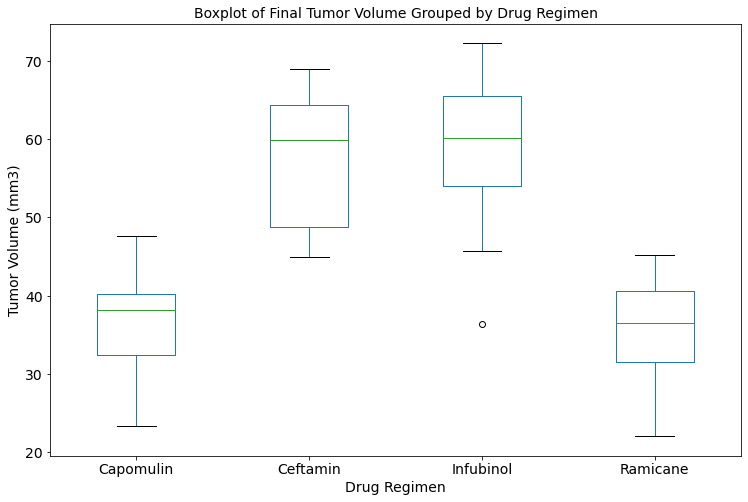

In [258]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# Create a dictionary to store the outlier formatting 
green_diamond = dict(markerfacecolor='g', marker='D')

# Create a df containing just the drug regiment and final tumor volume data
plot_data = drug_data[['Drug Regimen', 'Final Tumor Vol']]

# Create 4 boxplots of this data, grouped by drug regimen
plot = plot_data.boxplot(by="Drug Regimen", column="Final Tumor Vol", grid=False, figsize=(12,8), fontsize=14)

# Formatting and Display
plot.set_ylabel("Tumor Volume (mm3)", fontsize=14)
plot.set_xlabel("Drug Regimen", fontsize=14)
plot.set_title("Boxplot of Final Tumor Volume Grouped by Drug Regimen", fontsize=14)
plt.suptitle("")
plt.show()


## Line and Scatter Plots

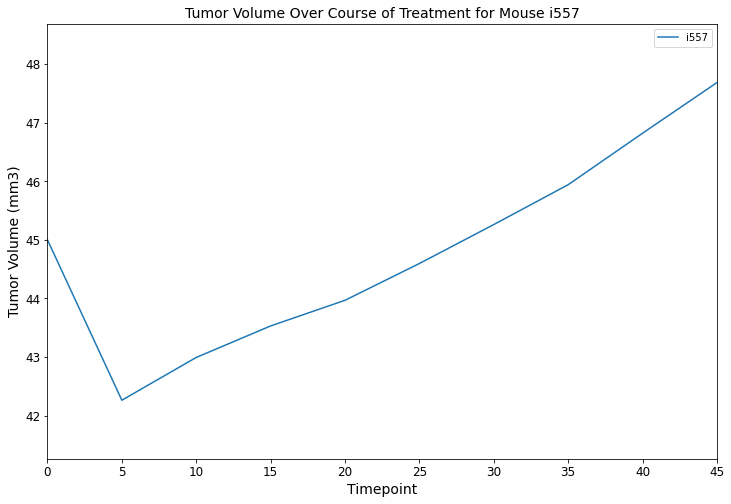

In [259]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Mouse with ID 'i557' chosen from the data set
plot_mouse = df[df["Mouse ID"] == "i557"] 

# Line plot of this mouses tumor volume vs time
plot = plot_mouse.plot.line(x="Timepoint", y="Tumor Volume (mm3)", figsize=(12,8), label="i557")

# Formatting and Display
plot.set_ylabel("Tumor Volume (mm3)", fontsize=14)
plot.set_xlabel("Timepoint", fontsize=14)
plot.set_title("Tumor Volume Over Course of Treatment for Mouse i557", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(plot_mouse['Tumor Volume (mm3)'].min()-1, plot_mouse['Tumor Volume (mm3)'].max()+1)
plt.xlim(plot_mouse['Timepoint'].min(), plot_mouse['Timepoint'].max())
plt.show()


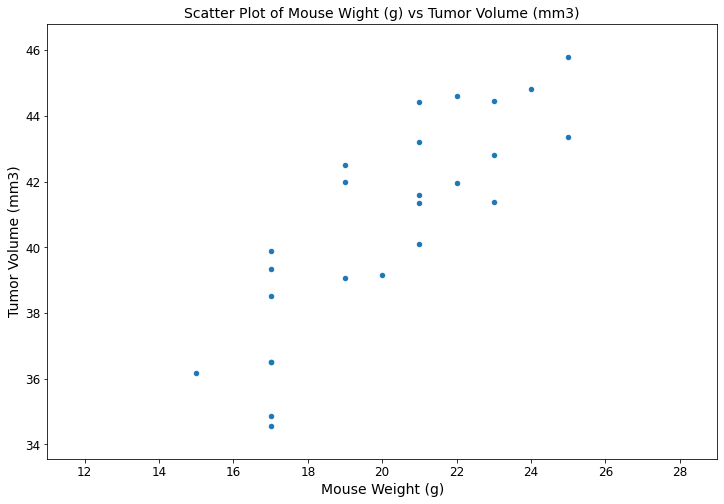

In [264]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a df of just the Capomulin data
cap_data = df[df["Drug Regimen"] == "Capomulin"] 
# Create a lists for average tumor volume, and mouse weight for each mouse in the Capomulin regimen group 
mean_tumor_vol = pd.DataFrame(cap_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()).reset_index()
weight = pd.DataFrame(cap_data.groupby(["Mouse ID"])["Weight (g)"].max()).reset_index()
# Merge these yielding a df which can be plotted
plot_data = pd.merge(mean_tumor_vol, weight, on="Mouse ID")

# Scatter plot of mouse weight vs tumor volume
plot = plot_data.plot.scatter(x="Weight (g)", y="Tumor Volume (mm3)", figsize=(12,8))

# Formatting and Display
plot.set_ylabel("Tumor Volume (mm3)", fontsize=14)
plot.set_xlabel("Mouse Weight (g)", fontsize=14)
plot.set_title("Scatter Plot of Mouse Wight (g) vs Tumor Volume (mm3)", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(plot_data['Tumor Volume (mm3)'].min()-1, plot_data['Tumor Volume (mm3)'].max()+1)
plt.xlim(plot_data['Weight (g)'].min()-4, plot_data['Weight (g)'].max()+4)
plt.show()


## Correlation and Regression

In [280]:
# -- CORRELATION -- 
# Calculate the correlation coefficient  

correlation = st.pearsonr(plot_data["Weight (g)"] , plot_data["Tumor Volume (mm3)"])

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
print("")


The correlation between mouse weight and average tumor volume is 0.84



The r-squared is: 0.71


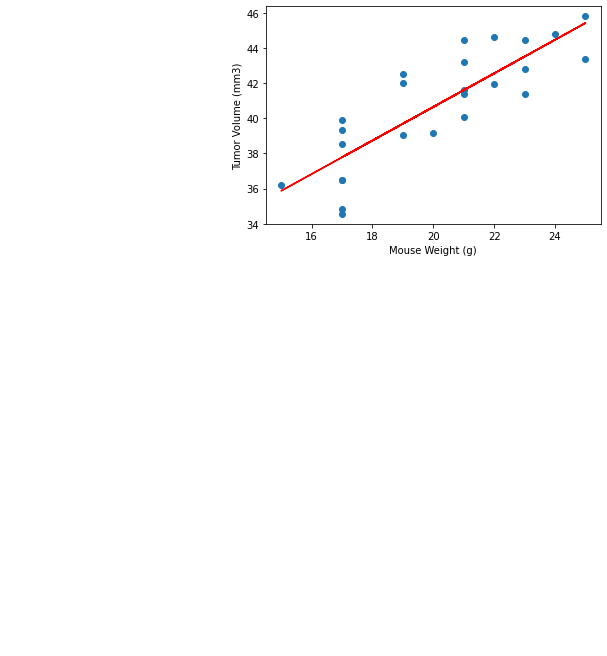

In [297]:
# -- LINEAR REGRESSION --  
# Set x and y values
x_values = plot_data["Weight (g)"]
y_values = plot_data["Tumor Volume (mm3)"]

# Calulate the linear regression equation for the data
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the data and the regression equation
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')

print(f"The r-squared is: {round((rvalue**2),2)}")
plt.show()